# Rag Evaluation Visualisation

In [7]:
!pip install matplotlib seaborn

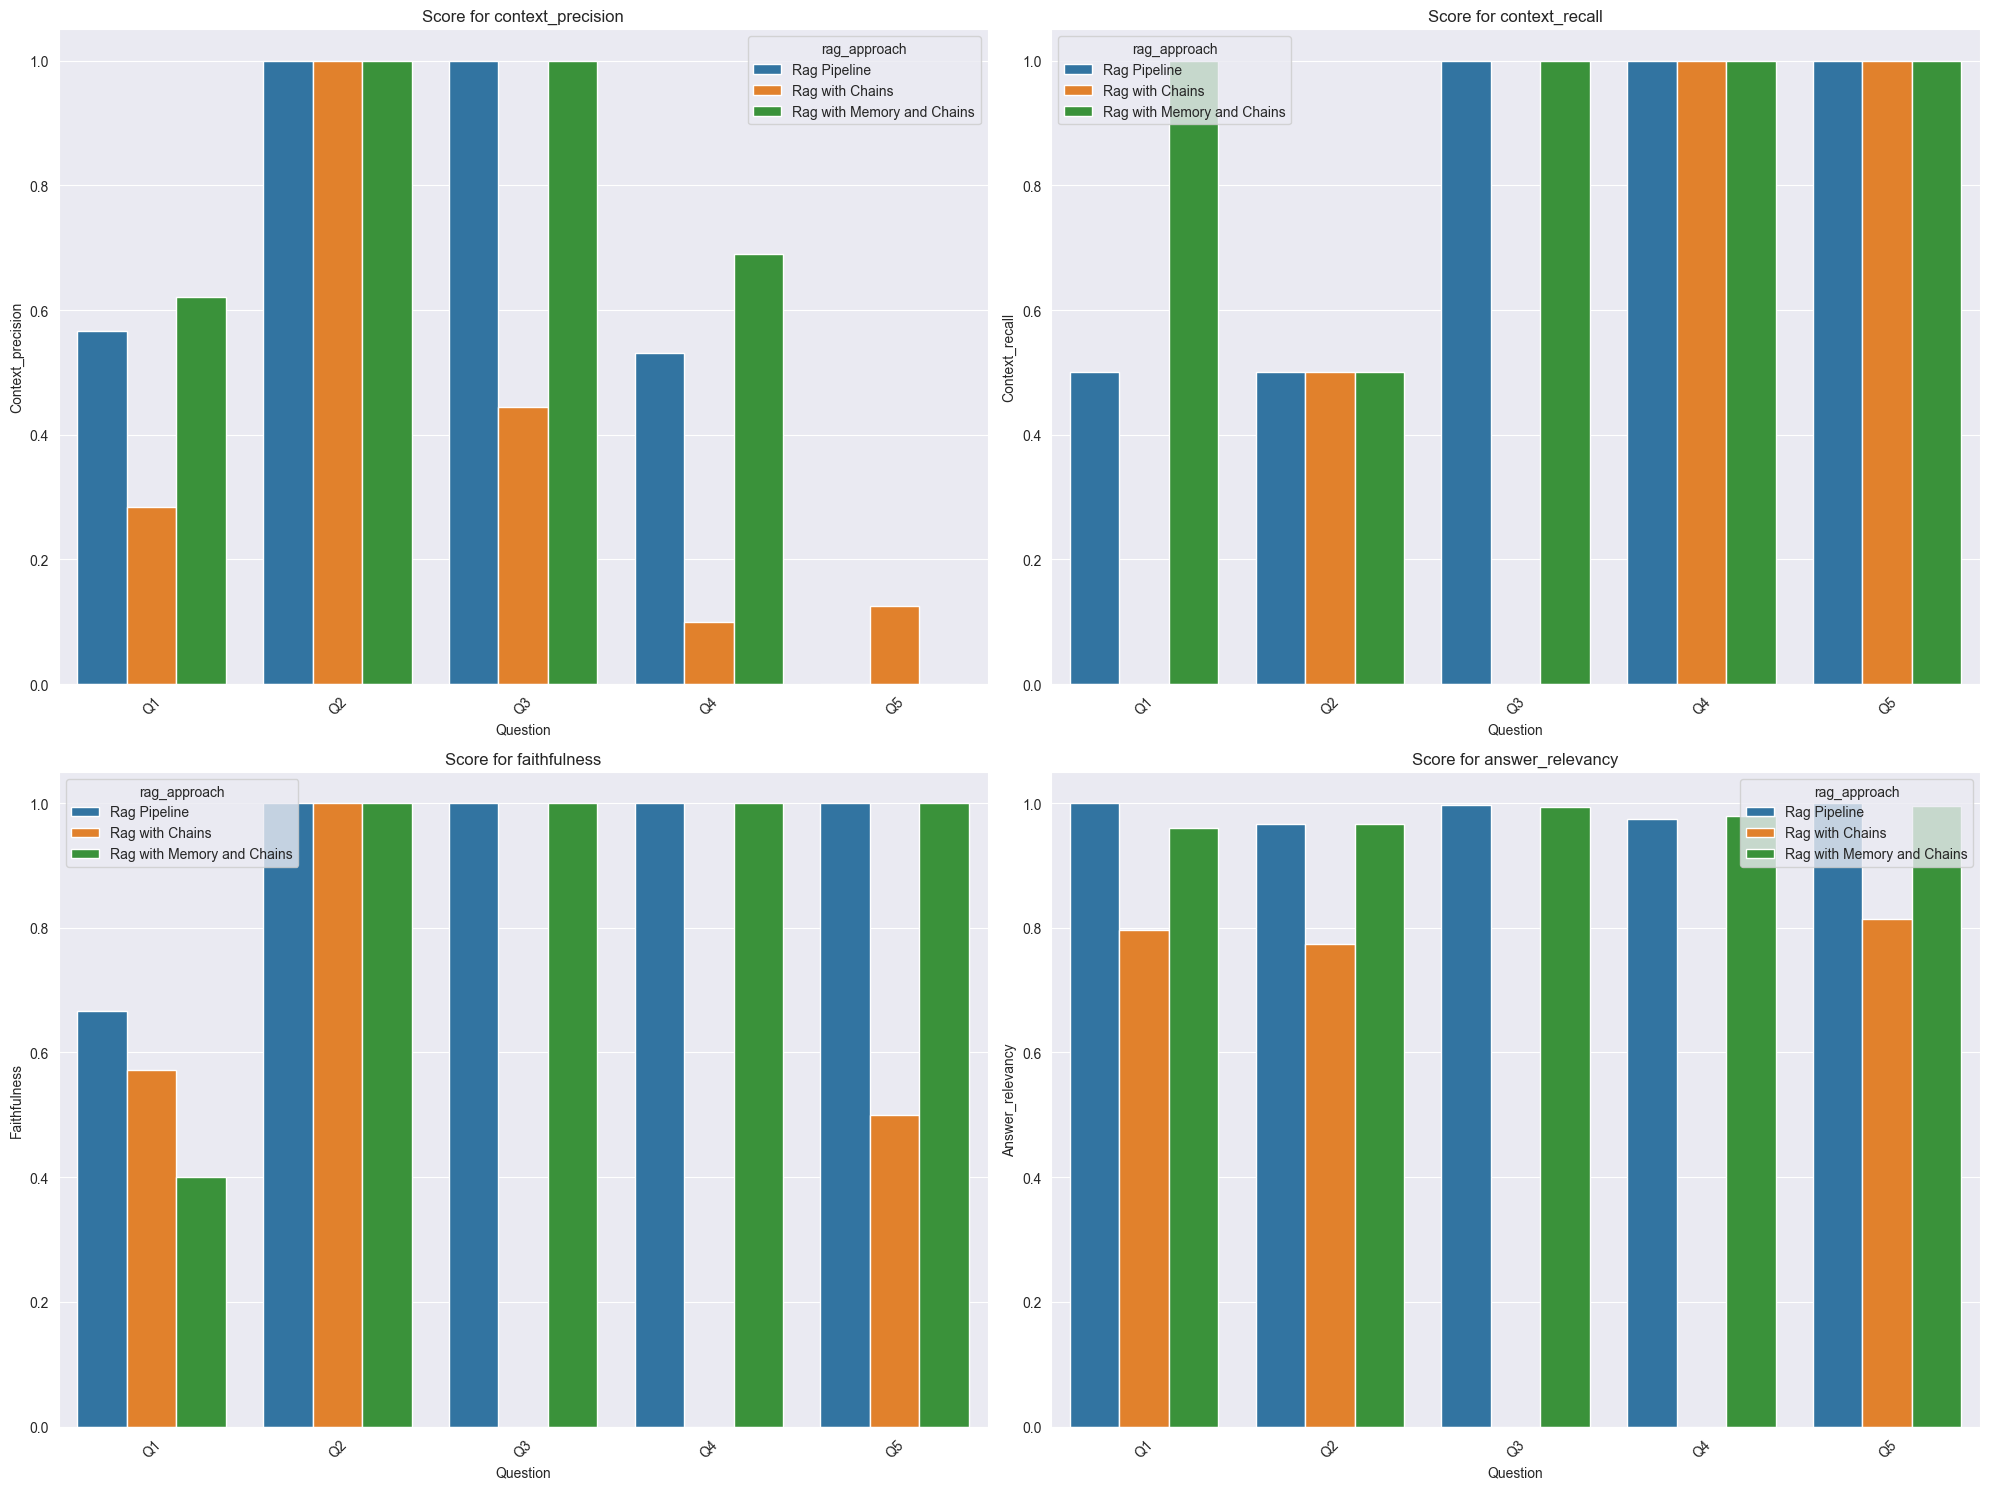

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CSV has been saved as 'combined_ragas_evaluations.csv' and is now loaded
file_path = 'combined_ragas_evaluations.csv'  # Update with your actual file path if different
df = pd.read_csv(file_path)

# Rename questions to Q1, Q2, Q3, etc.
question_mapping = {q: f"Q{i+1}" for i, q in enumerate(sorted(df['question'].unique()))}
df['question'] = df['question'].map(question_mapping)

metrics = ["context_precision", "context_recall", "faithfulness", "answer_relevancy"]
questions = sorted(df['question'].unique())  # Sorting the questions

# Initialize a large figure to hold all subplots
plt.figure(figsize=(20, 15))

# Loop through each metric to create a subplot for each
for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df, x='question', y=metric, hue='rag_approach', order=questions)  # Using the sorted order
    plt.title(f'Score for {metric}')
    plt.xticks(rotation=45)
    plt.ylabel(metric.capitalize())
    plt.xlabel('Question')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


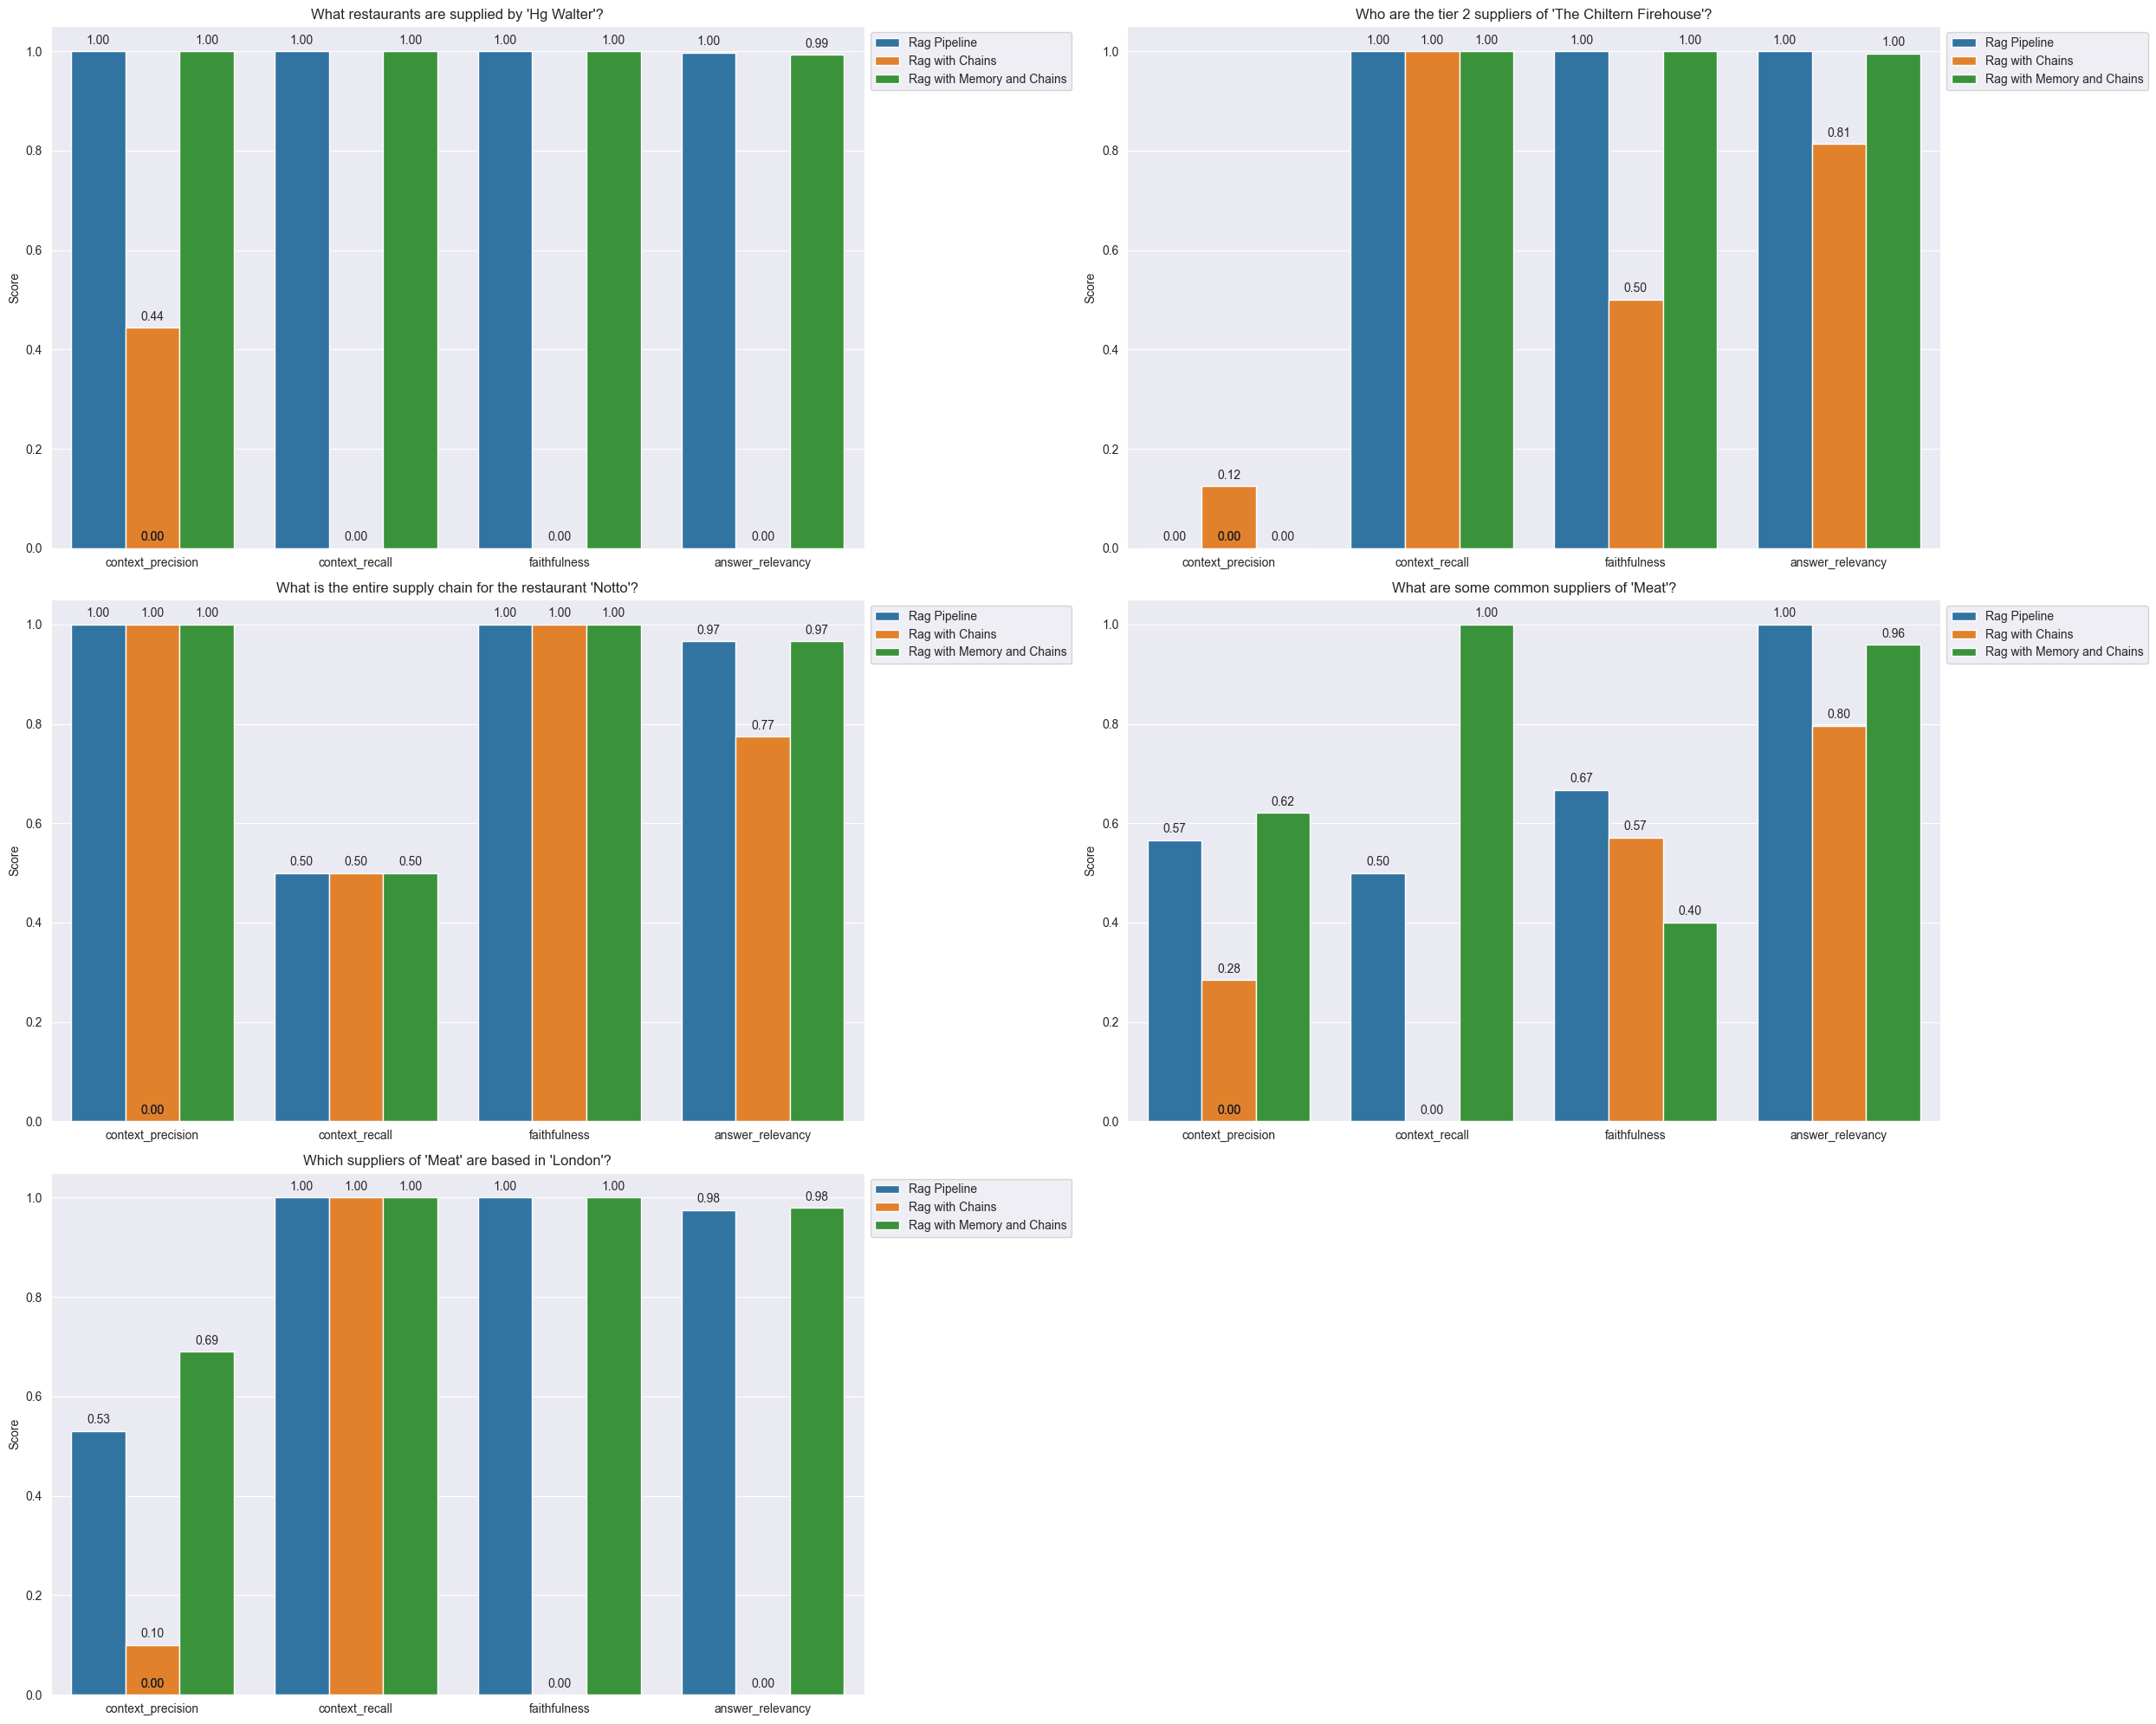

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_ragas_evaluations.csv'
df = pd.read_csv(file_path)

# Define the metrics and full questions
metrics = ["context_precision", "context_recall", "faithfulness", "answer_relevancy"]
full_questions = {
    "Q1": "What restaurants are supplied by 'Hg Walter'?",
    "Q2": "Who are the tier 2 suppliers of 'The Chiltern Firehouse'?",
    "Q3": "What is the entire supply chain for the restaurant 'Notto'?",
    "Q4": "What are some common suppliers of 'Meat'?",
    "Q5": "Which suppliers of 'Meat' are based in 'London'?"
}

# Reverse mapping from full questions to "Q1", "Q2", etc.
reverse_question_mapping = {v: k for k, v in full_questions.items()}
df['question_code'] = df['question'].map(reverse_question_mapping)

# Melt the DataFrame to have 'metric' and 'score' columns
df_melted = df.melt(id_vars=['question', 'question_code', 'rag_approach'], 
                     value_vars=metrics, 
                     var_name='metric', 
                     value_name='score')

# Initialize a large figure to hold all subplots
plt.figure(figsize=(25, 20))

# Loop through each question to create a subplot for each
for i, question_code in enumerate(df['question_code'].unique(), start=1):
    plt.subplot(3, 2, i)
    question_data = df_melted[df_melted['question_code'] == question_code]
    ax = sns.barplot(data=question_data, x='metric', y='score', hue='rag_approach')
    
    # Add the full question as the title
    ax.set_title(full_questions[question_code])
    
    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
    
    plt.ylabel('Score')
    plt.xlabel('')
    
    # Place the legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
